# [ppt](https://drive.google.com/file/d/12MtlPGAXMCJdxWzyI9bfgnzzFtWNTD-q/view)


The task is to predicct whether a bank currency note is authentic or not based on four attributes i.e.,variance of the image,wavelet transformed image,skewness,entropy and curtosis of the image.

Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

Attribute Information:
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

In [1]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv("https://raw.githubusercontent.com/GirishaDevara/ML-TOT-Review/master/bank_authentication.csv")

In [6]:
dataset.sample(2)

,Variance,Skewness,Curtosis,Entropy,Class
1166,-2.1979,-2.1252,1.7151,0.45171,1
167,1.0235,6.9010,-2.0062,-2.71250,0


In [7]:
dataset.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [20]:
#Prepare the dataset for training
X = dataset.drop(['Class'], axis=1)
y = dataset.Class
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

**Standardization** is useful for data which has negative values. It arranges the data in a standard normal distribution. It is more useful in classification than regression.

In [22]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
#Training the algorithm
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier(n_estimators=30,random_state = 1)
cl.fit(X_train,y_train)
y_predict = cl.predict(X_test)

n_estimators :integer optional (default = 100) ***The number of trees in the forest.***


Criterion :string,optional (default = 'gini') ***The function to measure the quality of the split.This parameter is tree specific***

In [35]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print('confusion_matrix :',confusion_matrix(y_test,y_predict),sep='\n\n')
print('*************',end='\n\n')
print("accuracy_score",accuracy_score(y_test,y_predict))
print("classification_report",classification_report(y_test,y_predict))

confusion_matrix :

[[155   2]
 [  1 117]]
*************

accuracy_score 0.9890909090909091
classification_report               precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



#Unfortunately there's no easy to graph the "best" tree or an overall ensemble tree from 
your forest,just a random example u need to consider a specific estimator.

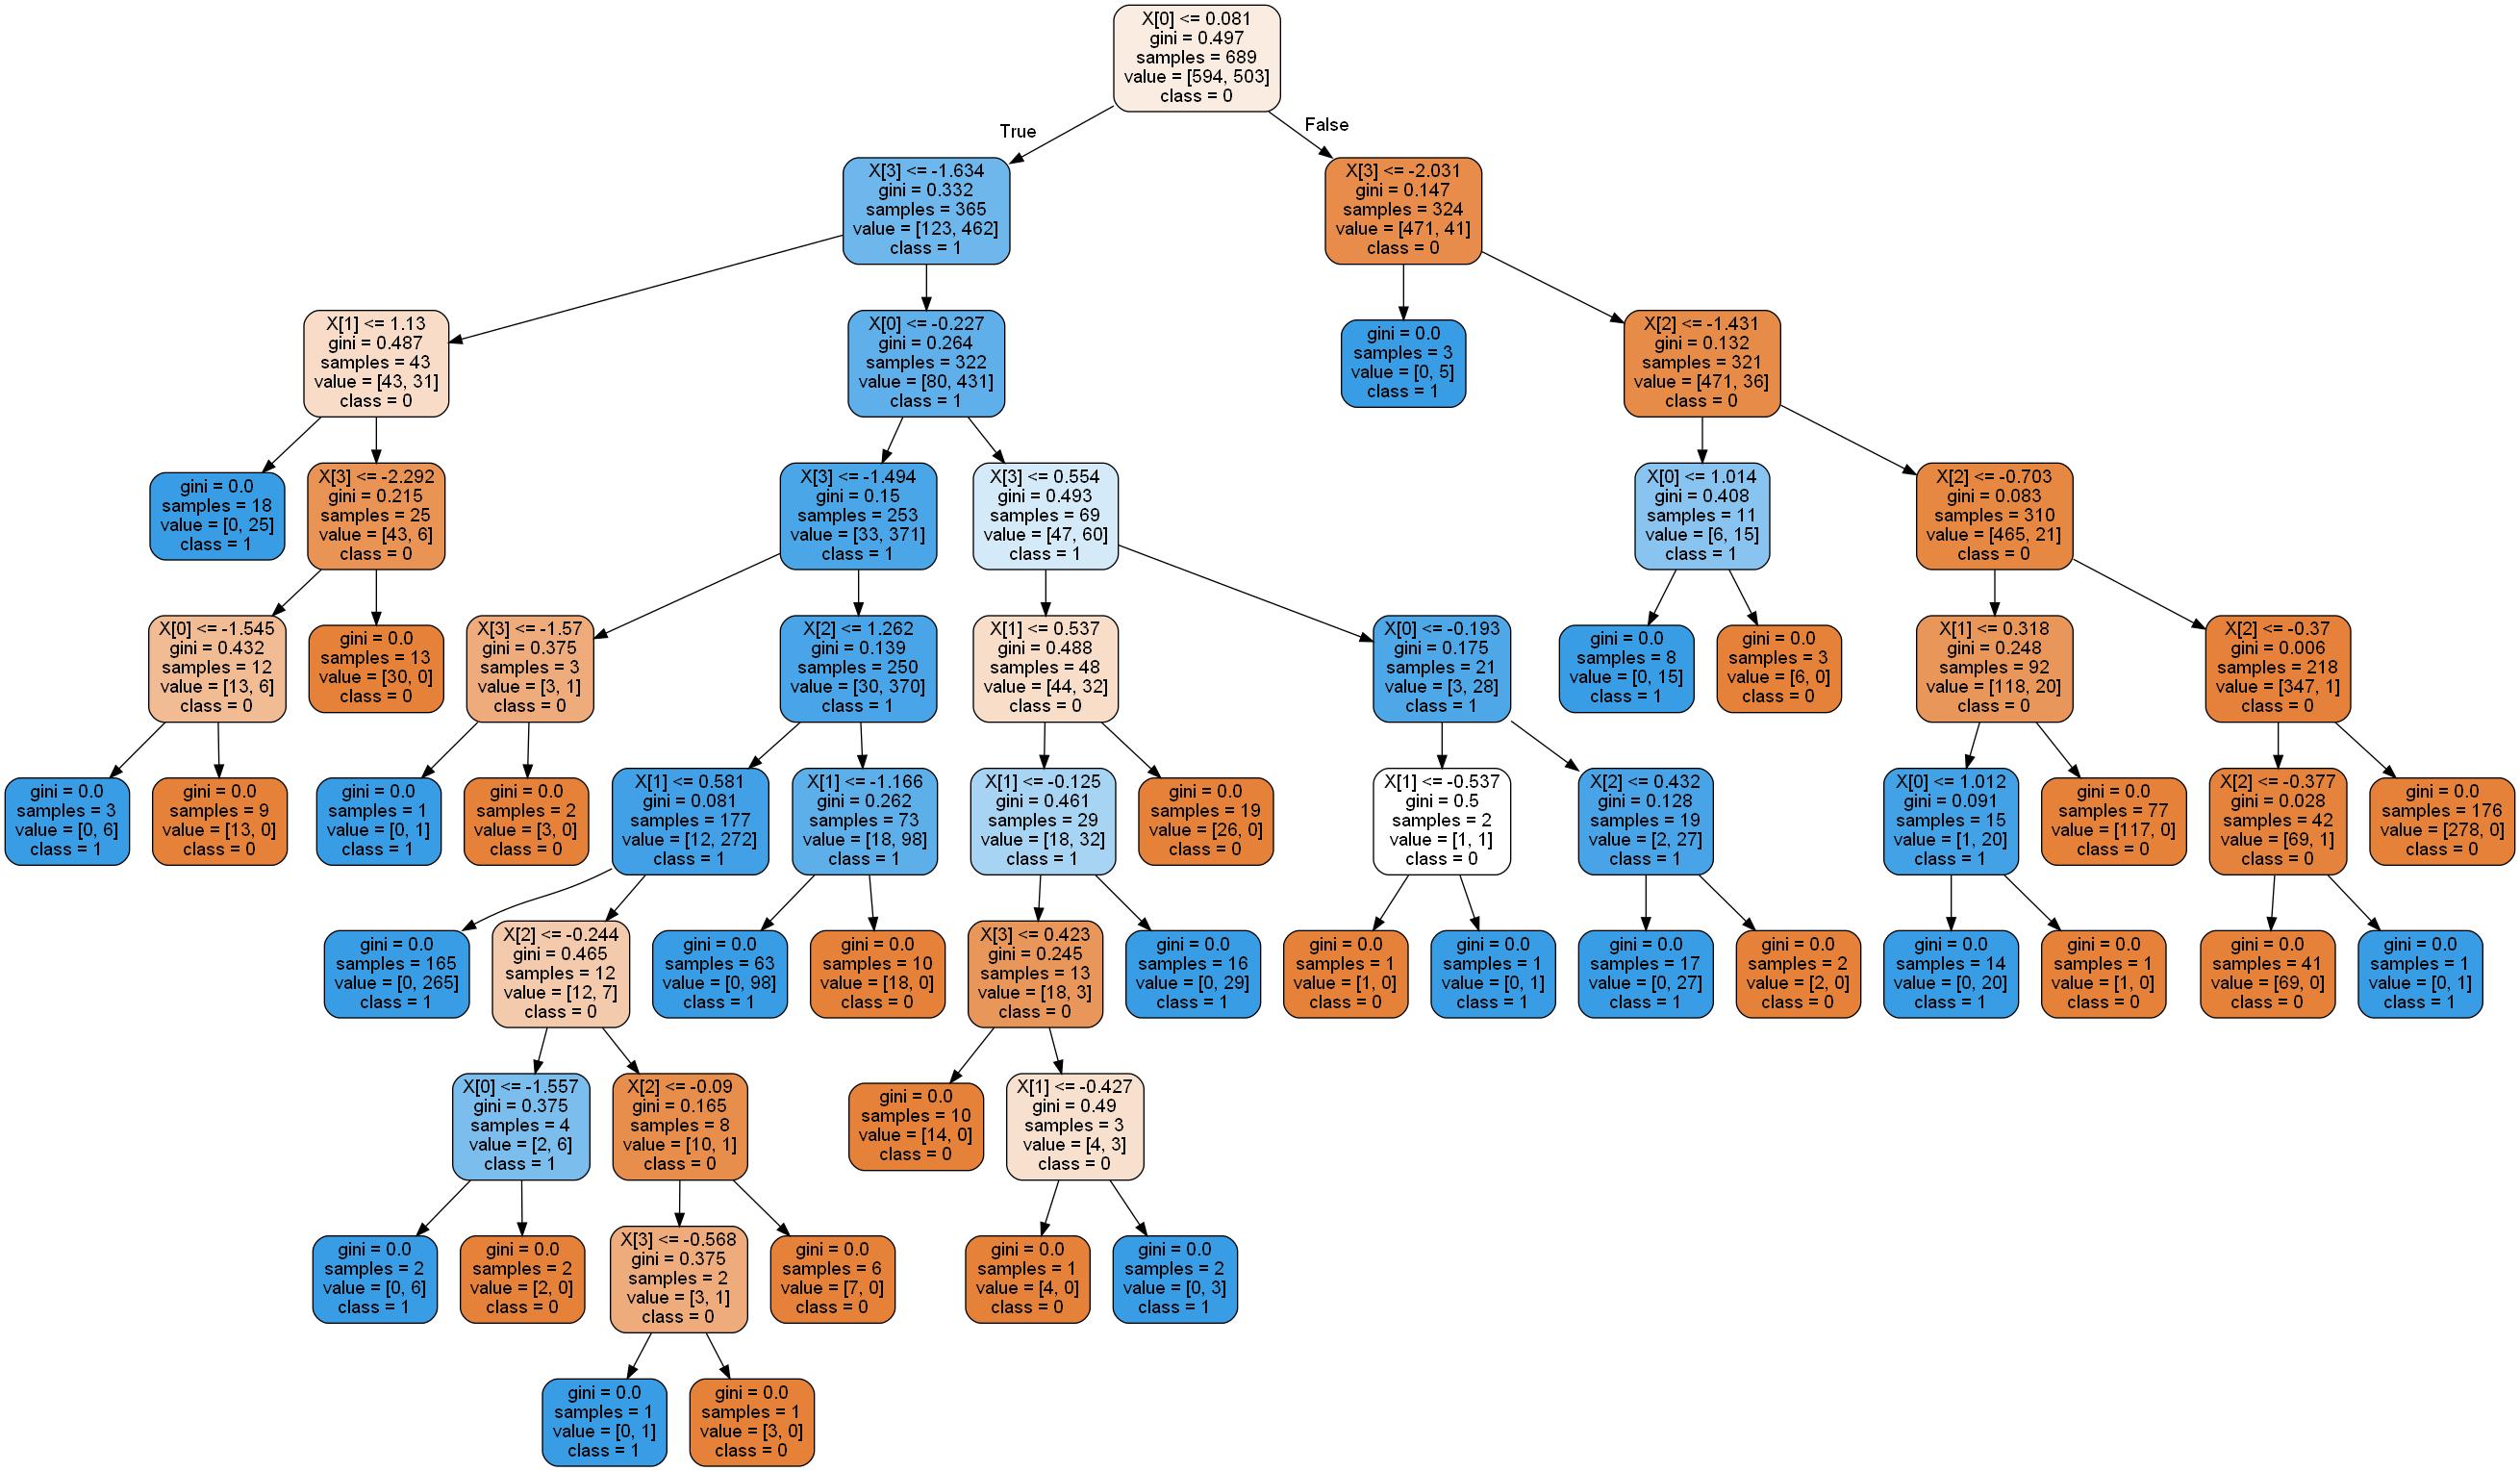

In [37]:
from six import StringIO
from sklearn.tree import export_graphviz
from  pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = StringIO()
export_graphviz(cl.estimators_[1],out_file=dot_data,
                filled = True,rounded = True,
                class_names=['0','1'])
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#graph.write_pdf('1sttree.pdf')

In [38]:
cl.predict([[3.6216,8.6661,-2.8073,-0.44699]])

array([0], dtype=int64)

The problem here is to predict the gas consumption (in millions of gallons) in 48 of the US states based on petrol tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with the driving license

In [39]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/GirishaDevara/ML-TOT-Review/master/petrol_consumption.csv')

In [45]:
dataset.sample()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
19,8.5,4341,6010,0.677,640


In [41]:
dataset.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [42]:
#Prepare the dataset for training
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Feature Scaling
We know our dataset is not yet a scaled value, for instance the Average_Income field has values 
in the range of thousands while Petrol_tax has values in range of tens. 
Therefore, it would be beneficial to scale our data 

In [46]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
#Training the Algorithm
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

n_estimators:integer, optional (default=10)

The number of trees in the forest.

criterion :string, optional (default=”mse”)
The function to measure the quality of a split. Supported criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion, and “mae” for the mean absolute error.

In [48]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squated Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 51.76500000000001
Mean Squared Error: 4216.166749999999
Root Mean Squated Error 64.93201637097064


With 20 trees,the root mean squared error is 64.93 which is greate than 10% of the average of petrol consumption i.e.,576.77.This indicates that we have not used enough number of estimators(trees).

In [49]:
y_pred = regressor.predict([[9.0,3571,1976,0.525]])

In [50]:
y_pred

array([506.1])

In [69]:
#Training the Algorithm
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=150, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [70]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squated Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 48.09866666666668
Mean Squared Error: 3539.186853333334
Root Mean Squated Error 59.49106532357052


In [71]:
y_pred = regressor.predict([[7.50,4870,2351,0.529]])

In [72]:
y_pred

array([505.05333333])